# Random catalogue with radial selection function
This code demonstrates sampling from a radial selection function.  The selection function is specified with a binned redshift distribution N(z).

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pypelid.sky.catalogue_store import CatalogueStore
from pypelid.vm.syncat import SynCat
from pypelid.survey.mask import Mask

# Construct a simple polygon mask
A mask may be built from a list of polygons.  Vertices are connected by great circles.  The mask is saved to a file with pickle.

In [2]:
polygons = [[(-20,-20),(20,-20),(20,20),(-20,20)]]
mask = Mask()
mask.import_vertices(polygons)
mask.dump('in/square_mask.pickle')

INFO:pypelid.survey.mask:Loaded 1 polygons
INFO:pypelid.survey.mask:Wrote data to file in/square_mask.pickle.  time=0.000582


# Construct demo redshift distribution
The redshift distribution N(z) is made from two Gaussians and saved to a file

In [3]:
zedges = np.linspace(0, 2, 20)
zc = (zedges[1:] + zedges[:-1]) / 2.
nz = np.exp(-(zc - 1.15)**2/2./0.2**2) + 2*np.exp(-(zc - 0.7)**2/2./0.1**2)
nz = nz * 1. / nz.sum()
pickle.dump((zc, nz), file('out/zdist_demo.pickle','w'))

# Initialize SynCat
We build a random catalogue with SynCat.  The `method='radial'` option sets up the radial selection function mode.

In [4]:
S = SynCat(verbose=0,
           overwrite=True,
           out_cat='out/galaxies.radial.pypelid.hdf5',
           zdist_file='out/zdist_demo.pickle',
           mask_file='in/square_mask.pickle',
           density=10,
           method='radial')

INFO:pypelid.survey.mask:Loaded data from file in/square_mask.pickle.  num centers: 1, dt=0.000511


After setting up, the `run()` method is called to generate the catalogue.  The output will be written to the catalogue file `zdist_file`.

In [5]:
S.run()

Now load the catalogue as a numpy array.

In [6]:
randoms = CatalogueStore('out/galaxies.radial.pypelid.hdf5').to_structured_array()

# Plot results

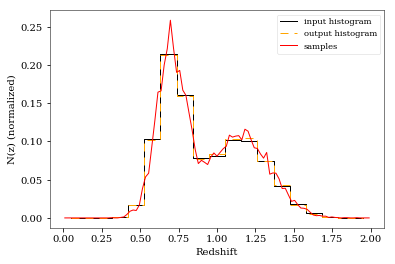

In [7]:
h,e = np.histogram(randoms['z'], np.linspace(0,2,100))
h2,e2 = np.histogram(randoms['z'], zedges)

plt.plot(zc, nz, ls='steps-mid', label='input histogram', c='k')
plt.plot(zc, h2*1./h2.sum(), ls='steps-mid', 
         label='output histogram', c='orange', dashes=[4,3])

plt.plot((e[1:]+e[:-1])/2., h*1./h.sum() * 100./len(nz), label='samples', c='r')
plt.xlabel("Redshift")
plt.ylabel("N(z) (normalized)")
plt.legend()
plt.show()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


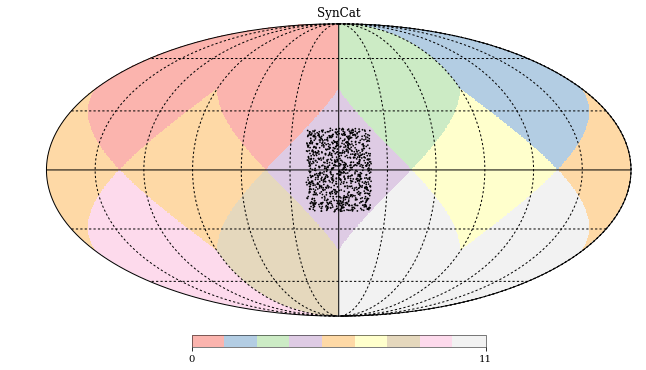

In [8]:
import healpy
import matplotlib.cm as cm
cmap = cm.Pastel1
cmap.set_under('w')
healpy.mollview(np.arange(12), cmap=cmap, title="SynCat")
skycoord = randoms['skycoord']
np.random.shuffle(skycoord)
ra,dec = skycoord[:1000].T
lat = np.pi/180*(90-dec)
lon = np.pi/180*ra
healpy.projscatter(lat, lon, s=3, c='k', edgecolor='None')
healpy.graticule()
plt.show()